In [2]:
!pip install graphviz

In [3]:
import pandas as pd # for data manipulation
import numpy as np # for data manipulation

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn import tree # for decision tree models

import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization
import graphviz # for plotting decision tree graphs

In [4]:
# Set Pandas options to display more columns
pd.options.display.max_columns=50

In [5]:
# Read in the weather data csv
df=pd.read_csv('C:/Users/Admin/Machine Learning chapter 5/weatherAUS.csv', encoding='utf-8')
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0            NaN           W           44.0          W        WNW   
1            NaN         WNW           44.0        NNW        WSW   
2            NaN         WSW           46.0          W        WSW   
3            NaN          NE           24.0         SE          E   
4            NaN           W           41.0        ENE         NW   
...          ...         ...            ...        ...        ...   
145455       NaN           E           31.0         SE        ENE   
145456       NaN         NNW           22.0         SE          N   
145457       NaN           N           37.0         SE        WNW   
145458       NaN          SE           28.0        SSE          N   
145459       NaN         NaN            NaN        ESE        ESE   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   
145459          17.0          17.0         62.0         36.0       1020.2   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
0            1007.1       8.0       NaN     16.9     21.8        No   
1            1007.8       NaN       NaN     17.2     24.3        No   
2            1008.7       NaN       2.0     21.0     23.2        No   
3            1012.8       NaN       NaN     18.1     26.5        No   
4            1006.0       7.0       8.0     17.8     29.7        No   
...             ...       ...       ...      ...      ...       ...   
145455       1020.3       NaN       NaN     10.1     22.4        No   
145456       1019.1       NaN       NaN     10.9     24.5        No   
145457       1016.8       NaN       NaN     12.5     26.1        No   
145458       1016.5       3.0       2.0     15.1     26.0        No   
145459       1017.9       8.0       8.0     15.0     20.9        No   

       RainTomorrow  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
145455           No  
145456           No  
145457           No  
145458           No  
145459          NaN  

[145460 rows x 23 columns]

In [6]:
# Drop records where target RainTomorrow=NaN
df=df[pd.isnull(df['RainTomorrow'])==False]

# For other columns with missing values, fill them in with column mean
df=df.fillna(df.mean())

C:\Users\Admin\AppData\Local\Temp/ipykernel_19944/440301566.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df=df.fillna(df.mean())


In [7]:
# Create a flag for RainToday and RainTomorrow, note RainTomorrowFlag will be our target variable
df['RainTodayFlag']=df['RainToday'].apply(lambda x: 1 if x=='Yes' else 0)
df['RainTomorrowFlag']=df['RainTomorrow'].apply(lambda x: 1 if x=='Yes' else 0)

In [8]:
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6     5.469824   
1       2008-12-02   Albury      7.4     25.1       0.0     5.469824   
2       2008-12-03   Albury     12.9     25.7       0.0     5.469824   
3       2008-12-04   Albury      9.2     28.0       0.0     5.469824   
4       2008-12-05   Albury     17.5     32.3       1.0     5.469824   
...            ...      ...      ...      ...       ...          ...   
145454  2017-06-20    Uluru      3.5     21.8       0.0     5.469824   
145455  2017-06-21    Uluru      2.8     23.4       0.0     5.469824   
145456  2017-06-22    Uluru      3.6     25.3       0.0     5.469824   
145457  2017-06-23    Uluru      5.4     26.9       0.0     5.469824   
145458  2017-06-24    Uluru      7.8     27.0       0.0     5.469824   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0       7.624853           W           44.0          W        WNW   
1       7.624853         WNW           44.0        NNW        WSW   
2       7.624853         WSW           46.0          W        WSW   
3       7.624853          NE           24.0         SE          E   
4       7.624853           W           41.0        ENE         NW   
...          ...         ...            ...        ...        ...   
145454  7.624853           E           31.0        ESE          E   
145455  7.624853           E           31.0         SE        ENE   
145456  7.624853         NNW           22.0         SE          N   
145457  7.624853           N           37.0         SE        WNW   
145458  7.624853          SE           28.0        SSE          N   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145454          15.0          13.0         59.0         27.0       1024.7   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
0            1007.1  8.000000  4.503167     16.9     21.8        No   
1            1007.8  4.437189  4.503167     17.2     24.3        No   
2            1008.7  4.437189  2.000000     21.0     23.2        No   
3            1012.8  4.437189  4.503167     18.1     26.5        No   
4            1006.0  7.000000  8.000000     17.8     29.7        No   
...             ...       ...       ...      ...      ...       ...   
145454       1021.2  4.437189  4.503167      9.4     20.9        No   
145455       1020.3  4.437189  4.503167     10.1     22.4        No   
145456       1019.1  4.437189  4.503167     10.9     24.5        No   
145457       1016.8  4.437189  4.503167     12.5     26.1        No   
145458       1016.5  3.000000  2.000000     15.1     26.0        No   

       RainTomorrow  RainTodayFlag  RainTomorrowFlag  
0                No              0                 0  
1                No              0                 0  
2                No              0                 0  
3                No              0                 0  
4                No              0                 0  
...             ...            ...               ...  
145454           No              0                 0  
145455           No              0                 0  
145456           No              0             

In [9]:
# Select data for modeling
X=df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 
      'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',  
      'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainTodayFlag']]
y=df['RainTomorrowFlag'].values

In [10]:
# Create training and testing samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches.

In [11]:
 # Fit the model
model = tree.DecisionTreeClassifier(criterion='gini', 
                                        splitter='best', 
                                        max_depth=3,
                                        class_weight=None,
                                        min_samples_leaf=1000, 
                                        random_state=0,)

In [12]:
clf = model.fit(X_train, y_train)

# Predict class labels on training data
pred_labels_tr = model.predict(X_train)
# Predict class labels on a test data
pred_labels_te = model.predict(X_test)

In [13]:
# Tree summary and model evaluation metrics
print('*************** Tree Summary ***************')
print('Classes: ', clf.classes_)
print('Tree Depth: ', clf.tree_.max_depth)
print('No. of leaves: ', clf.tree_.n_leaves)
print('No. of features: ', clf.n_features_in_)
print('--------------------------------------------------------')
print("")

*************** Tree Summary ***************
Classes:  [0 1]
Tree Depth:  3
No. of leaves:  8
No. of features:  17
--------------------------------------------------------



In [14]:
print('*************** Evaluation on Test Data ***************')
score_te = model.score(X_test, y_test)
print('Accuracy Score: ', score_te)
# Look at classification report to evaluate the model
print(classification_report(y_test, pred_labels_te))
print('--------------------------------------------------------')
print("")

*************** Evaluation on Test Data ***************
Accuracy Score:  0.828439818559021
              precision    recall  f1-score   support

           0       0.84      0.97      0.90     22067
           1       0.76      0.34      0.47      6372

    accuracy                           0.83     28439
   macro avg       0.80      0.65      0.68     28439
weighted avg       0.82      0.83      0.80     28439

--------------------------------------------------------



In [15]:
print('*************** Evaluation on Training Data ***************')
score_tr = model.score(X_train, y_train)
print('Accuracy Score: ', score_tr)
# Look at classification report to evaluate the model
print(classification_report(y_train, pred_labels_tr))
print('--------------------------------------------------------')

*************** Evaluation on Training Data ***************
Accuracy Score:  0.8278214392460924
              precision    recall  f1-score   support

           0       0.83      0.97      0.90     88249
           1       0.76      0.34      0.47     25505

    accuracy                           0.83    113754
   macro avg       0.80      0.65      0.68    113754
weighted avg       0.82      0.83      0.80    113754

--------------------------------------------------------


We can see that the model performs relatively well in predicting dry days. However, the performance is worse on predicting rainy days, with precision on test data being 0.76 and recall 0.34.

Precision means that it will actually rain tomorrow in 76% of those cases where the model predicts a rainy day.
Meanwhile, recall means that for all the rainy days in the test data, the model only identified 34% of them.
The difference in performance across the two class labels is largely driven by an imbalance in the data, with many more dry days available(0) than rainy days(1).

In [16]:
#see the imbalance
df['RainTomorrowFlag'].value_counts()

0    110316
1     31877
Name: RainTomorrowFlag, dtype: int64

In [18]:
#percentage of cero values is 77% of the target values. 
110316/(110316+31877)

0.7758187815152645

# CART classification model using Gini Impurity and 2 features

In [19]:
# Select data for modeling
X_2=df[['WindGustSpeed', 'Humidity3pm']]
y=df['RainTomorrowFlag'].values

In [20]:
# Create training and testing samples
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.2, random_state=0)

In [21]:
 # Fit the model
model_2 = tree.DecisionTreeClassifier(criterion='gini', 
                                        splitter='best', 
                                        max_depth=3,
                                        class_weight=None,
                                        min_samples_leaf=1000, 
                                        random_state=0,)

In [22]:
clf_2 = model_2.fit(X_train, y_train)

# Predict class labels on training data
pred_labels_tr = clf_2.predict(X_train)
# Predict class labels on a test data
pred_labels_te = clf_2.predict(X_test)

In [23]:
# Tree summary and model evaluation metrics
print('*************** Tree Summary ***************')
print('Classes: ', clf_2.classes_)
print('Tree Depth: ', clf_2.tree_.max_depth)
print('No. of leaves: ', clf_2.tree_.n_leaves)
print('No. of features: ', clf_2.n_features_in_)
print('--------------------------------------------------------')
print("")

*************** Tree Summary ***************
Classes:  [0 1]
Tree Depth:  3
No. of leaves:  8
No. of features:  2
--------------------------------------------------------



In [24]:
print('*************** Evaluation on Test Data ***************')
score_te = clf_2 .score(X_test, y_test)
print('Accuracy Score: ', score_te)
# Look at classification report to evaluate the model
print(classification_report(y_test, pred_labels_te))
print('--------------------------------------------------------')
print("")

*************** Evaluation on Test Data ***************
Accuracy Score:  0.828439818559021
              precision    recall  f1-score   support

           0       0.84      0.97      0.90     22067
           1       0.76      0.34      0.47      6372

    accuracy                           0.83     28439
   macro avg       0.80      0.65      0.68     28439
weighted avg       0.82      0.83      0.80     28439

--------------------------------------------------------



In [25]:
print('*************** Evaluation on Training Data ***************')
score_tr = clf_2 .score(X_train, y_train)
print('Accuracy Score: ', score_tr)
# Look at classification report to evaluate the model
print(classification_report(y_train, pred_labels_tr))
print('--------------------------------------------------------')

*************** Evaluation on Training Data ***************
Accuracy Score:  0.8278214392460924
              precision    recall  f1-score   support

           0       0.83      0.97      0.90     88249
           1       0.76      0.34      0.47     25505

    accuracy                           0.83    113754
   macro avg       0.80      0.65      0.68    113754
weighted avg       0.82      0.83      0.80    113754

--------------------------------------------------------


The difference in performance across the two class labels is largely driven by an imbalance in the data, with many more dry days available than rainy days.

In [26]:
def Plot_3D(X, X_test, y_test, clf, x1, x2, mesh_size, margin):
            
    # Specify a size of the mesh to be used
    mesh_size=mesh_size
    margin=margin

    # Create a mesh grid on which we will run our model
    x_min, x_max = X.iloc[:, 0].fillna(X.mean()).min() - margin, X.iloc[:, 0].fillna(X.mean()).max() + margin
    y_min, y_max = X.iloc[:, 1].fillna(X.mean()).min() - margin, X.iloc[:, 1].fillna(X.mean()).max() + margin
    xrange = np.arange(x_min, x_max, mesh_size)
    yrange = np.arange(y_min, y_max, mesh_size)
    xx, yy = np.meshgrid(xrange, yrange)
            
    # Calculate predictions on grid
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)

    # Create a 3D scatter plot with predictions
    fig = px.scatter_3d(x=X_test[x1], y=X_test[x2], z=y_test,
                     opacity=0.8, color_discrete_sequence=['black'])

    # Set figure title and colors
    fig.update_layout(#title_text="Scatter 3D Plot with CART Prediction Surface",
                      paper_bgcolor = 'white',
                      scene = dict(xaxis=dict(title=x1,
                                              backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0'),
                                   yaxis=dict(title=x2,
                                              backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0'
                                              ),
                                   zaxis=dict(title='Probability of Rain Tomorrow',
                                              backgroundcolor='lightgrey',
                                              color='black', 
                                              gridcolor='#f0f0f0', 
                                              )))
    
    # Update marker size
    fig.update_traces(marker=dict(size=1))

    # Add prediction plane
    fig.add_traces(go.Surface(x=xrange, y=yrange, z=Z, name='CART Prediction',
                              colorscale='Jet',
                              reversescale=True,
                              showscale=False, 
                              contours = {"z": {"show": True, "start": 0.5, "end": 0.9, "size": 0.5}}))
    fig.show()
    return fig

In [27]:
#check the figure in the repositoy files. 
fig = Plot_3D(X_2, X_test, y_test, clf_2, x1='WindGustSpeed', x2='Humidity3pm', mesh_size=1, margin=1)

C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# CART classification model with unlimited tree depth

In [114]:
 # Fit the model
model_3 = tree.DecisionTreeClassifier(criterion='gini', 
                                        splitter='best', 
                                        max_depth=None,
                                        class_weight=None,
                                        min_samples_leaf=1000, 
                                        random_state=0,)

In [115]:
clf_3 = model_3.fit(X_train, y_train)

# Predict class labels on training data
pred_labels_tr = clf_3.predict(X_train)
# Predict class labels on a test data
pred_labels_te = clf_3.predict(X_test)

In [116]:
# Tree summary and model evaluation metrics
print('*************** Tree Summary ***************')
print('Classes: ', clf_2.classes_)
print('Tree Depth: ', clf_2.tree_.max_depth)
print('No. of leaves: ', clf_2.tree_.n_leaves)
print('No. of features: ', clf_2.n_features_in_)
print('--------------------------------------------------------')
print("")

*************** Tree Summary ***************
Classes:  [0 1]
Tree Depth:  3
No. of leaves:  8
No. of features:  2
--------------------------------------------------------



In [117]:
print('*************** Evaluation on Test Data ***************')
score_te = clf_2 .score(X_test, y_test)
print('Accuracy Score: ', score_te)
# Look at classification report to evaluate the model
print(classification_report(y_test, pred_labels_te))
print('--------------------------------------------------------')
print("")

*************** Evaluation on Test Data ***************
Accuracy Score:  0.828439818559021
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     22067
           1       0.73      0.40      0.52      6372

    accuracy                           0.83     28439
   macro avg       0.79      0.68      0.71     28439
weighted avg       0.82      0.83      0.81     28439

--------------------------------------------------------



# I put no limit on three depth but the No. of leaves are the same. This happens because whether the best weighted Gini Impurity for the two child nodes is not lower than Gini Impurity for the parent node, the model stop splitting the parent node. F1 score on class 1 improves a little bit. 

Whenever you build decision tree models, you should carefully consider the trade-off between complexity and performance. In this specific example, a tiny increase in performance is not worth the extra complexity.

You can change ‘gini’ to ‘entropy’ to build a model using an entropy-based algorithm.
You can use a ‘random’ splitter instead of ‘best.’ ‘Best’ always takes the feature with the highest importance to produce the next split. Meanwhile, ‘random’ would select a random feature (although weighted by the feature importance distribution).
As demonstrated above, you can change the maximum allowed depth for the tree.
You can adjust ‘class_weight’ (named clweight in our fitting function) by passing a dictionary with weights for each class or simply putting in ‘balanced’ for the algorithm to balance out class samples using weighting.
Finally, you can also try adjusting the minimum leaf size.

# Decision Tree Classifier with more than two labels. Multiclassifier. 

In [28]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree

In [55]:
import pandas as pd
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

In [56]:
df['target'] = data.target

In [57]:
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
145       2  
146       2  
147       2  
148       2  
149       2  

[150 rows x 5 columns]

In [58]:
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [59]:
x_train, X_test, y_train, Y_test = train_test_split(df[data.feature_names], df['target'],test_size=0.2, random_state=0)

In [60]:
# Step 2: Make an instance of the Model
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)
# Step 3: Train the model on the data
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

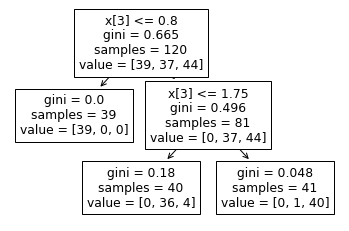

In [61]:
#it seems that the default method is gini. 
tree.plot_tree(clf);

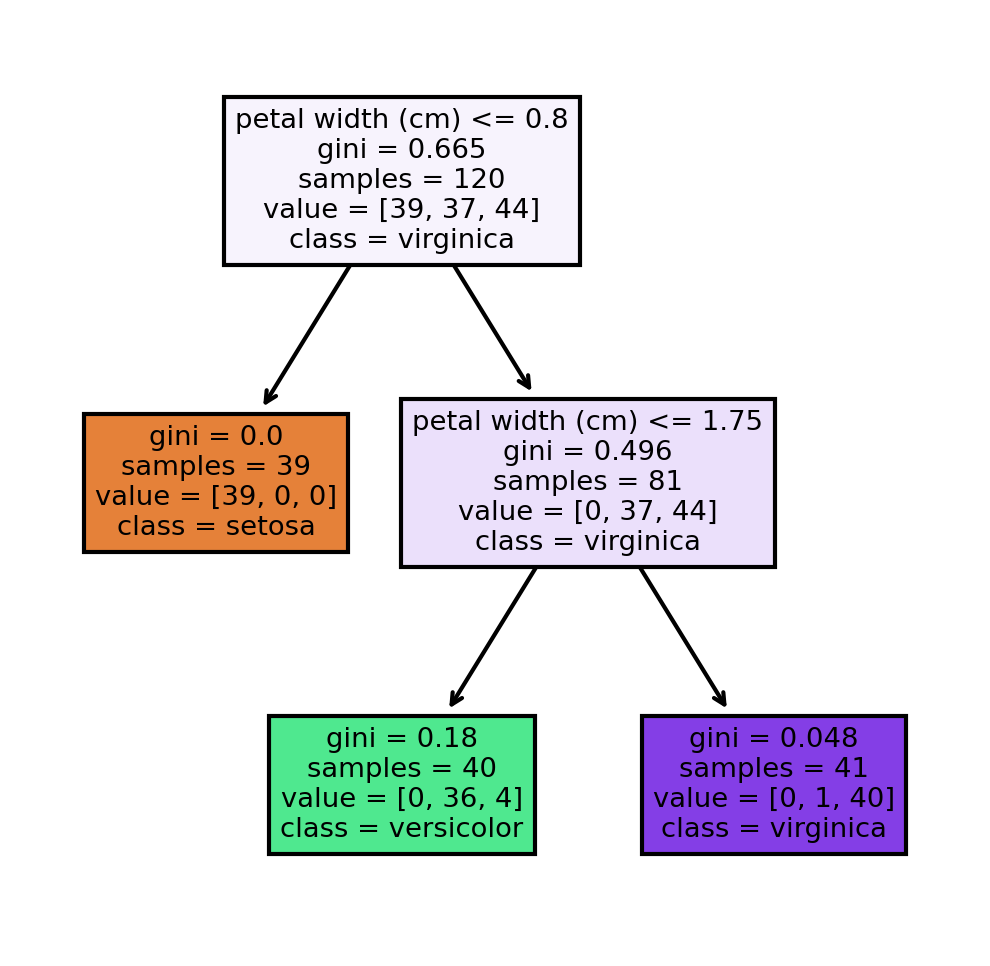

In [62]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
#fig.savefig('imagename.png')

In [63]:
# Predict class labels on training data
pred_labels_tr = clf.predict(X_train)
# Predict class labels on a test data
pred_labels_te = clf.predict(X_test)

In [64]:
# Tree summary and model evaluation metrics
print('*************** Tree Summary ***************')
print('Classes: ', clf.classes_)
print('Tree Depth: ', clf.tree_.max_depth)
print('No. of leaves: ', clf.tree_.n_leaves)
print('No. of features: ', clf.n_features_in_)
print('--------------------------------------------------------')
print("")

*************** Tree Summary ***************
Classes:  [0 1 2]
Tree Depth:  2
No. of leaves:  3
No. of features:  4
--------------------------------------------------------



In [65]:
print('*************** Evaluation on Test Data ***************')
score_te = clf .score(X_test, Y_test)
print('Accuracy Score: ', score_te)
# Look at classification report to evaluate the model
print(classification_report(Y_test, pred_labels_te))
print('--------------------------------------------------------')
print("")

*************** Evaluation on Test Data ***************
Accuracy Score:  0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

--------------------------------------------------------



In [68]:
print('*************** Evaluation on Training Data ***************')
score_tr = clf.score(x_train, y_train)
print('Accuracy Score: ', score_tr)
# Look at classification report to evaluate the model
print(classification_report(y_train, pred_labels_tr))
print('--------------------------------------------------------')

*************** Evaluation on Training Data ***************
Accuracy Score:  0.9583333333333334
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.90      0.97      0.94        37
           2       0.98      0.91      0.94        44

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120

--------------------------------------------------------


In [77]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [69]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("C:/Users/Admin/Machine Learning chapter 5/diabetes.csv", header=None, names=col_names)
pima

pregnant  glucose             bp           skin  insulin   bmi  \
0    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
1              6      148             72             35        0  33.6   
2              1       85             66             29        0  26.6   
3              8      183             64              0        0  23.3   
4              1       89             66             23       94  28.1   
..           ...      ...            ...            ...      ...   ...   
764           10      101             76             48      180  32.9   
765            2      122             70             27        0  36.8   
766            5      121             72             23      112  26.2   
767            1      126             60              0        0  30.1   
768            1       93             70             31        0  30.4   

                     pedigree  age    label  
0    DiabetesPedigreeFunction  Age  Outcome  
1                       0.627   50        1  
2                       0.351   31        0  
3                       0.672   32        1  
4                       0.167   21        0  
..                        ...  ...      ...  
764                     0.171   63        0  
765                      0.34   27        0  
766                     0.245   30        0  
767                     0.349   47        1  
768                     0.315   23        0  

[769 rows x 9 columns]

In [70]:
pima = pima.drop(0,axis=0)
pima

pregnant glucose  bp skin insulin   bmi pedigree age label
1          6     148  72   35       0  33.6    0.627  50     1
2          1      85  66   29       0  26.6    0.351  31     0
3          8     183  64    0       0  23.3    0.672  32     1
4          1      89  66   23      94  28.1    0.167  21     0
5          0     137  40   35     168  43.1    2.288  33     1
..       ...     ...  ..  ...     ...   ...      ...  ..   ...
764       10     101  76   48     180  32.9    0.171  63     0
765        2     122  70   27       0  36.8     0.34  27     0
766        5     121  72   23     112  26.2    0.245  30     0
767        1     126  60    0       0  30.1    0.349  47     1
768        1      93  70   31       0  30.4    0.315  23     0

[768 rows x 9 columns]

In [71]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [73]:
y.unique()

array(['1', '0'], dtype=object)

In [74]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [75]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [78]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.70995670995671


In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, you can plot a decision tree on the same data with max_depth=3. Other than pre-pruning parameters, You can also try other attribute selection measure such as entropy.

In [79]:
# Create Decision Tree classifer object
clf_2 = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf_2 = clf_2.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf_2.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


# With pre-pruning we have improved the score from 0.70 to 0.77

[Text(0.5, 0.875, 'x[4] <= 127.5\nentropy = 0.926\nsamples = 537\nvalue = [354, 183]'),
 Text(0.25, 0.625, 'x[2] <= 26.45\nentropy = 0.72\nsamples = 342\nvalue = [274, 68]'),
 Text(0.125, 0.375, 'x[2] <= 9.1\nentropy = 0.201\nsamples = 96\nvalue = [93, 3]'),
 Text(0.0625, 0.125, 'entropy = 0.918\nsamples = 6\nvalue = [4, 2]'),
 Text(0.1875, 0.125, 'entropy = 0.088\nsamples = 90\nvalue = [89, 1]'),
 Text(0.375, 0.375, 'x[3] <= 27.5\nentropy = 0.833\nsamples = 246\nvalue = [181, 65]'),
 Text(0.3125, 0.125, 'entropy = 0.544\nsamples = 112\nvalue = [98, 14]'),
 Text(0.4375, 0.125, 'entropy = 0.958\nsamples = 134\nvalue = [83, 51]'),
 Text(0.75, 0.625, 'x[2] <= 28.15\nentropy = 0.977\nsamples = 195\nvalue = [80, 115]'),
 Text(0.625, 0.375, 'x[4] <= 145.5\nentropy = 0.82\nsamples = 43\nvalue = [32, 11]'),
 Text(0.5625, 0.125, 'entropy = 0.402\nsamples = 25\nvalue = [23, 2]'),
 Text(0.6875, 0.125, 'entropy = 1.0\nsamples = 18\nvalue = [9, 9]'),
 Text(0.875, 0.375, 'x[4] <= 158.5\nentropy = 0.

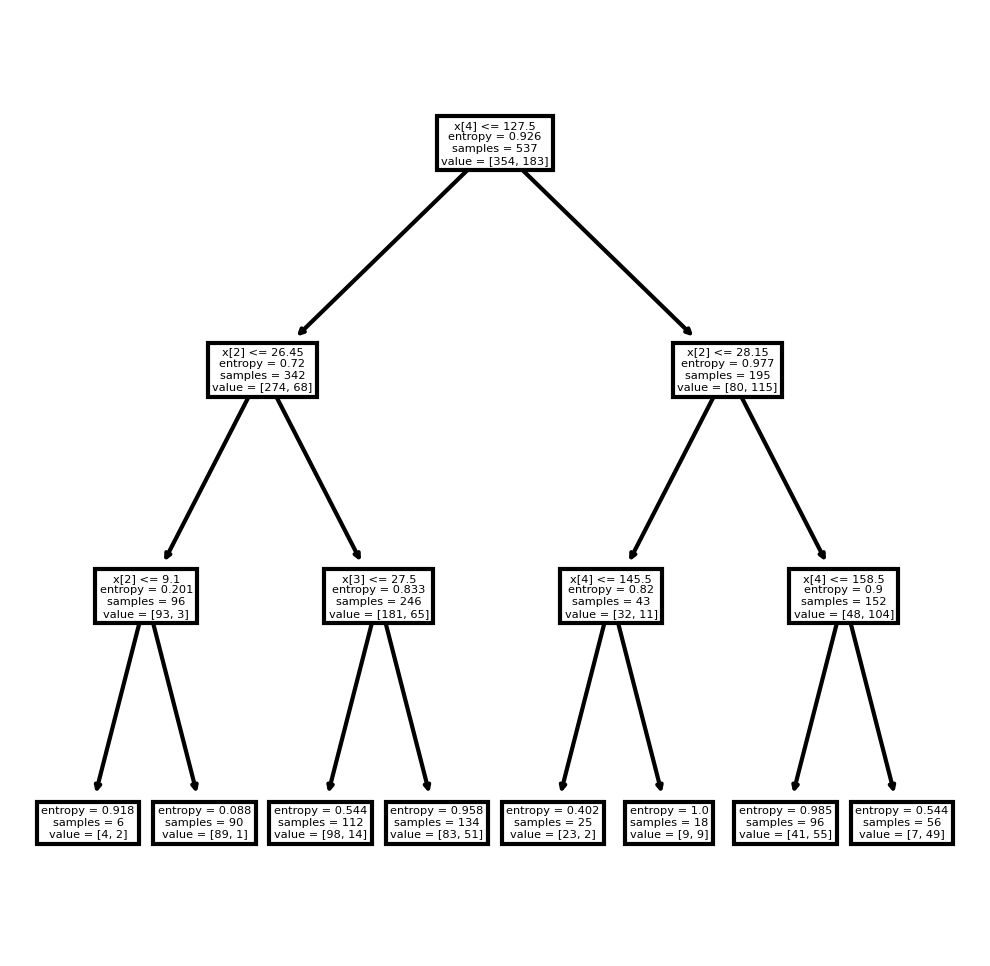

In [80]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf_2)
#fig.savefig('C:/Users/Admin/Machine Learning chapter 5/diabetestree.png')

Optimizing Decision Tree Performance
criterion : optional (default=”gini”) or Choose attribute selection measure. This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

splitter : string, optional (default=”best”) or Split Strategy. This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

max_depth : int or None, optional (default=None) or Maximum Depth of a Tree. The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).

In [148]:
import pandas as pd
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [149]:
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
145       2  
146       2  
147       2  
148       2  
149       2  

[150 rows x 5 columns]

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
X_train, X_test, Y_train, Y_test = train_test_split(df[data.feature_names], df['target'],test_size=0.2, random_state=0)

In [152]:
from sklearn.tree import DecisionTreeClassifier

In [154]:
#Step 2: Make an instance of the Model
#Also note that in my code below, I made random_state = 0 so that you can get the same results as me.

In [155]:
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)

In [156]:
Model_tree = clf.fit(X_train, Y_train)
Model_tree

DecisionTreeClassifier(max_depth=2, random_state=0)

In [158]:
# Predict for 1 observation
y_Predictions = clf.predict(X_test)

In [159]:
y_Predictions.shape

(30,)

In [161]:
Y_test.shape

(30,)

In [162]:
# The score method returns the accuracy of the model
score = clf.score(X_test, Y_test)
print(score)

0.9666666666666667


In [163]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 6))
# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    accuracy.append(score)

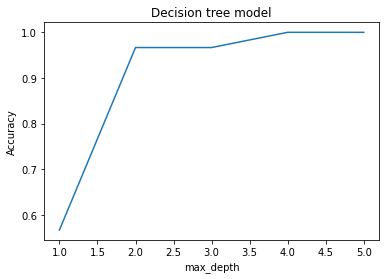

In [164]:
import matplotlib.pyplot as plt

x_axis = max_depth_range
y_axis = accuracy

plt.plot(x_axis, y_axis)
plt.title('Decision tree model')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.show()

Since the graph below shows that the best accuracy for the model is when the parameter max_depth is greater than or equal to 4, it might be best to choose the least complicated model with max_depth = 3.

 Classification trees in scikit-learn allow you to calculate feature importance which is the total amount that gini index or entropy decrease due to splits over a given feature. Scikit-learn outputs a number between 0 and 1 for each feature. All feature importances are normalized to sum to 1. The code below shows feature importances for each feature in a decision tree model.

In [165]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,5)})
importances = importances.sort_values('importance',ascending=False)

# petal width is the most important feature that the model is based to make the splits

In [166]:

importances

feature  importance
3   petal width (cm)     0.92302
2  petal length (cm)     0.06445
1   sepal width (cm)     0.01253
0  sepal length (cm)     0.00000

# Plot Decision Trees Using Python and Scikit-Learn

In [81]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

SEED = 42

data = datasets.load_wine()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED)

In [82]:
dt = DecisionTreeClassifier(max_depth=4,
                            random_state=SEED)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

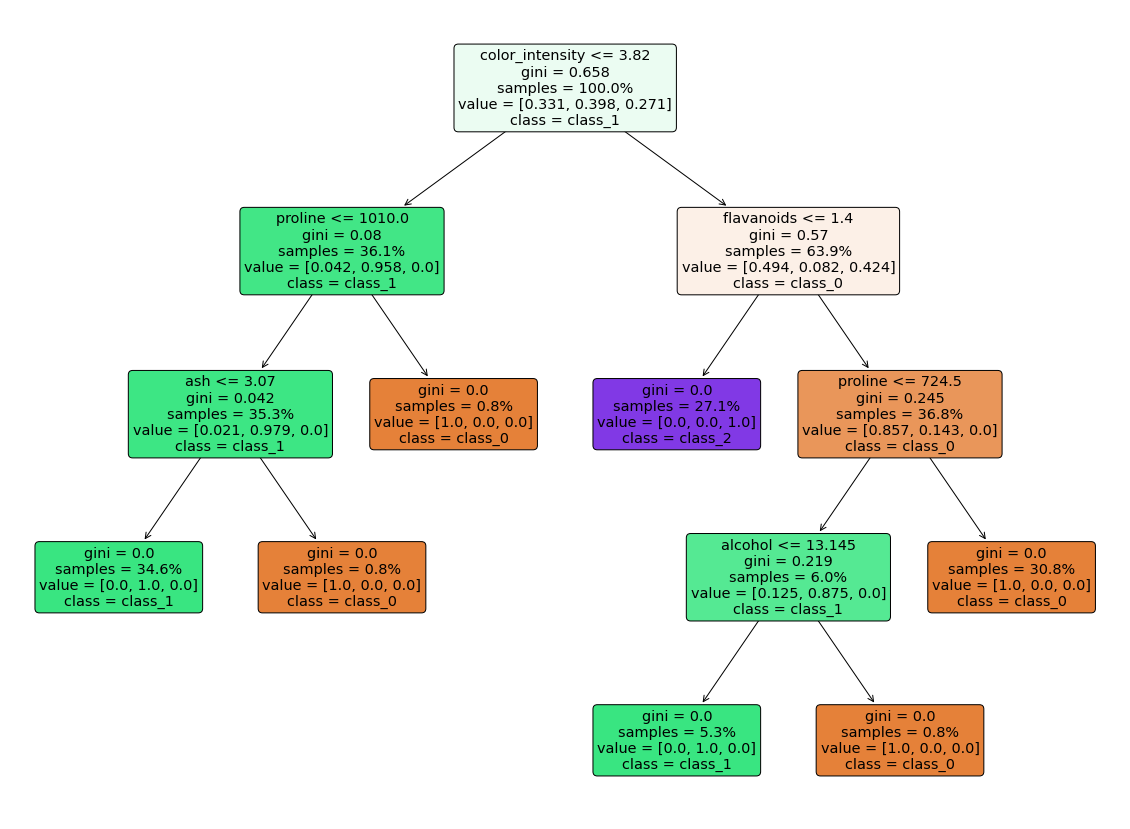

In [83]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
features = data.feature_names
classes = data.target_names

plt.figure(figsize=(20, 15))
plot_tree(dt,
          feature_names=features,
          class_names=classes,
          rounded=True, # Rounded node edges
          filled=True, # Adds color according to class
          proportion=True); # Displays the proportions of class samples instead of the whole number of samples

Multiple classifier. 

In [84]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

<Figure size 1440x1080 with 0 Axes>

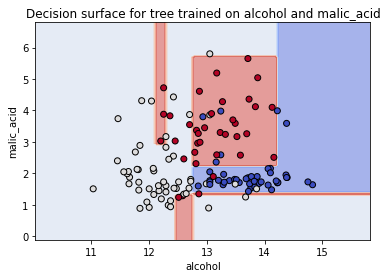

In [85]:
# Importing necessary libraries
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier 
# Choosing the first 2 columns for the plot
X_train_cols = X_train[:, :2] 
plt.figure(figsize=(20, 15))
# Creating and fitting the tree classifier
classifier = DecisionTreeClassifier(max_depth=4, 
                                    random_state=SEED).fit(X_train_cols, y_train)

# Plotting the tree boundaries
disp = DecisionBoundaryDisplay.from_estimator(classifier, 
                                              X_train_cols, 
                                              response_method="predict",
                                              xlabel=data.feature_names[0], ylabel=data.feature_names[1],
                                              alpha=0.5, 
                                              cmap=plt.cm.coolwarm)

# Plotting the data points    
disp.ax_.scatter(X_train[:, 0], X_train[:, 1], 
                 c=y_train, edgecolor="k",
                 cmap=plt.cm.coolwarm)

plt.title(f"Decision surface for tree trained on {data.feature_names[0]} and {data.feature_names[1]}")
plt.show()

In [87]:
# Predict class labels on training data
pred_labels_tr = dt.predict(X_train)
# Predict class labels on a test data
pred_labels_te = dt.predict(X_test)

In [88]:
print('*************** Evaluation on Test Data ***************')
score_te = dt.score(X_test, y_test)
print('Accuracy Score: ', score_te)
# Look at classification report to evaluate the model
print(classification_report(y_test, pred_labels_te))
print('--------------------------------------------------------')
print("")

*************** Evaluation on Test Data ***************
Accuracy Score:  0.9555555555555556
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.95      1.00      0.97        18
           2       1.00      0.92      0.96        12

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

--------------------------------------------------------



In [89]:
print('*************** Evaluation on Training Data ***************')
score_tr = dt.score(X_train, y_train)
print('Accuracy Score: ', score_tr)
# Look at classification report to evaluate the model
print(classification_report(y_train, pred_labels_tr))
print('--------------------------------------------------------')

*************** Evaluation on Training Data ***************
Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        53
           2       1.00      1.00      1.00        36

    accuracy                           1.00       133
   macro avg       1.00      1.00      1.00       133
weighted avg       1.00      1.00      1.00       133

--------------------------------------------------------


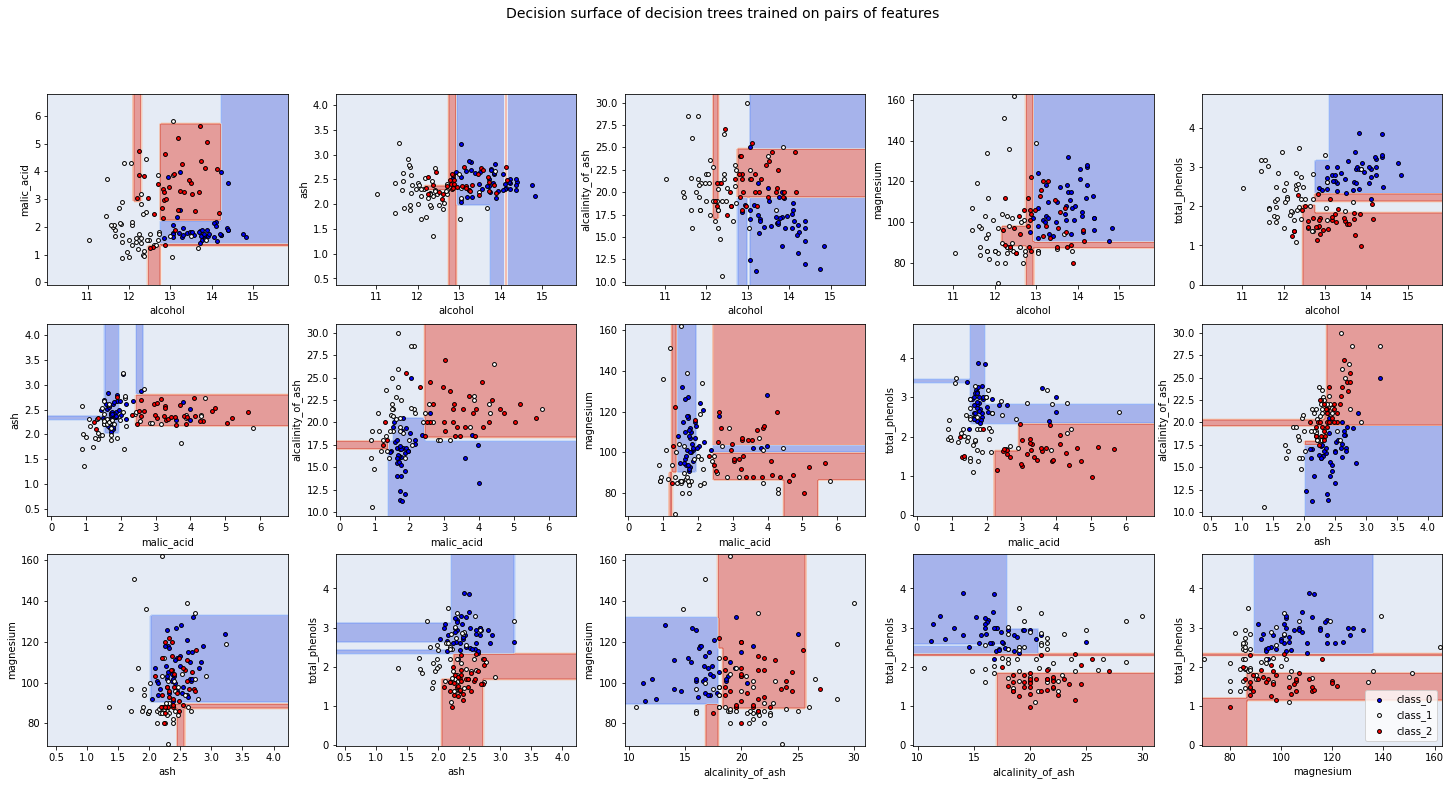

In [183]:
# Setting some parameters that will be used in the plot
n_classes = 3
color_palette = plt.cm.coolwarm
plot_colors = "bwr" # blue, white and red, same as the coolwarm palette
plot_step = 0.02

plt.figure(figsize=(25, 12))

for pair_idx, pair in enumerate(sorted(unique_combinations)):
    # Only two corresponding features are taken each time
    X_train_cols = X_train[:, pair]

    # Creating and fitting the classifier to train data
    classifier = DecisionTreeClassifier(max_depth=4, 
                                        random_state=SEED).fit(X_train_cols, y_train)

    # Defining a grid of 5 columns and 3 rows 
    ax = plt.subplot(3, 5, pair_idx + 1)
    # Plotting the pairs decision boundaries
    DecisionBoundaryDisplay.from_estimator(classifier,
                                           X_train_cols,
                                           cmap=color_palette,
                                           response_method="predict",
                                           ax=ax,
                                           xlabel=data.feature_names[pair[0]],
                                           ylabel=data.feature_names[pair[1]],
                                           alpha = 0.5)

    # Plotting the training points according to y_train class colors
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_train == i)
        plt.scatter(X_train_cols[idx, 0],
                    X_train_cols[idx, 1],
                    c=color,
                    label=data.target_names[i],
                    cmap=color_palette,
                    edgecolor="black",
                    s=15)

plt.suptitle("Decision surface of decision trees trained on pairs of features", fontsize=14)
plt.legend(loc="lower right");

In [184]:
from sklearn.datasets import make_classification 
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=1)

In [185]:
X

array([[-1.27399914, -3.21441014],
       [-1.23576237, -3.99795241],
       [ 1.85400449,  0.72698949],
       [ 0.72073196, -0.02628244],
       [ 2.25523379,  0.25356643],
       [-0.4475535 ,  1.18874683],
       [ 1.01874537,  1.02172543],
       [-1.68956304,  0.4808283 ],
       [ 0.25516196,  1.56328985],
       [ 1.01051268, -0.7761261 ],
       [-0.65016109,  2.79747275],
       [-1.43863355,  0.37383555],
       [ 0.04854689, -2.1702489 ],
       [ 1.84902956,  0.2103727 ],
       [-1.00691145, -0.73298888],
       [-1.17183919, -1.72239442],
       [-0.2771501 , -0.72371268],
       [-0.92485599,  0.09684717],
       [ 0.88234543, -1.40237389],
       [-1.28205358,  0.46940992],
       [-0.36200258,  1.51132512],
       [-2.05710548,  0.10216446],
       [ 0.55696541,  1.53146021],
       [ 2.12130169,  0.2921288 ],
       [ 1.20611342,  0.1115102 ],
       [ 0.9005356 , -2.94909695],
       [ 1.94668482,  0.51524942],
       [-1.03840323, -1.54524135],
       [ 2.81851032,

In [186]:
y

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1])

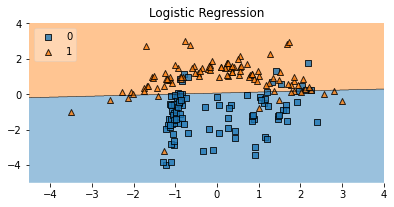

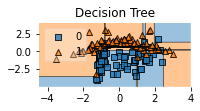

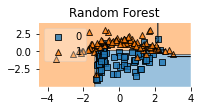

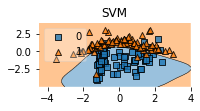

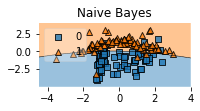

C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



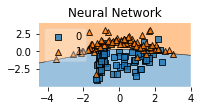

In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.neural_network import MLPClassifier
# Initializing Classifiers
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = RandomForestClassifier()
clf4 = SVC(gamma='auto')
clf5 = GaussianNB()
clf6 = MLPClassifier()
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
%matplotlib inline
gs = gridspec.GridSpec(3, 2)
fig = plt.figure(figsize=(14,10))
labels = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Naive Bayes', 'Neural Network']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6],
                         labels,
                         [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1)]):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)
    plt.show()

In [90]:
import numpy as np
import pandas as pd 
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [91]:
train_data = pd.read_csv('C:/Users/Admin/Machine Learning chapter 5/Classification Algorithms/train.csv')
test_data = pd.read_csv('C:/Users/Admin/Machine Learning chapter 5/Classification Algorithms/test.csv')

In [92]:
train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [94]:
test_data.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [95]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [96]:
#removing the unwanted columns. 
train_data = train_data.drop(['PassengerId', 'Name','SibSp',
       'Parch', 'Ticket','Cabin', 'Embarked'],axis=1)

In [97]:
test_data = test_data.drop(['PassengerId', 'Name','SibSp',
       'Parch', 'Ticket','Cabin', 'Embarked'],axis=1)

In [98]:
train_data.head()

Survived  Pclass     Sex   Age     Fare
0         0       3    male  22.0   7.2500
1         1       1  female  38.0  71.2833
2         1       3  female  26.0   7.9250
3         1       1  female  35.0  53.1000
4         0       3    male  35.0   8.0500

In [99]:
x_train = train_data.drop('Survived',axis=1)
x_train.replace({'male':0,'female':1},inplace =True)
y_train = train_data['Survived']

Removing null values

In [102]:
x_train.isnull().sum()

Pclass      0
Sex         0
Age       177
Fare        0
dtype: int64

In [103]:
x_train.Age = x_train.Age.fillna(x_train.Age.mean())

In [104]:
test_data.Age = test_data.Age.fillna(test_data.Age.mean())

In [105]:
test_data.Fare = test_data.Fare.fillna(test_data.Fare.mean())

In [106]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [111]:
test_data.replace({'male':0,'female':1},inplace =True)

In [112]:
test_data

Pclass  Sex       Age      Fare
0         3    0  34.50000    7.8292
1         3    1  47.00000    7.0000
2         2    0  62.00000    9.6875
3         3    0  27.00000    8.6625
4         3    1  22.00000   12.2875
..      ...  ...       ...       ...
413       3    0  30.27259    8.0500
414       1    1  39.00000  108.9000
415       3    0  38.50000    7.2500
416       3    0  30.27259    8.0500
417       3    0  30.27259   22.3583

[418 rows x 4 columns]

In [113]:
test_data.Age = test_data.Age.fillna(test_data.Age.mean())
test_data.Fare = test_data.Fare.fillna(test_data.Fare.mean())

In [114]:
x_test = test_data.values

In [115]:
x_test.shape

(418, 4)

In [116]:
#data the model has not seen and it has to predict whether the person has survived or not. 
test_data

Pclass  Sex       Age      Fare
0         3    0  34.50000    7.8292
1         3    1  47.00000    7.0000
2         2    0  62.00000    9.6875
3         3    0  27.00000    8.6625
4         3    1  22.00000   12.2875
..      ...  ...       ...       ...
413       3    0  30.27259    8.0500
414       1    1  39.00000  108.9000
415       3    0  38.50000    7.2500
416       3    0  30.27259    8.0500
417       3    0  30.27259   22.3583

[418 rows x 4 columns]

If you see the test_data does not have the target variable I only use it to make predictions
since that there is not y_test data. the target variable 'Survived'

Hence, with the test data we cannot get a score or classification report as there is not
y_test data. 

In [124]:
# Predict class labels on training data
pred_labels_tr = decision_tree.predict(x_train)
# Predict class labels on a test data
pred_labels_te = decision_tree.predict(x_test)

C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [126]:
x_train.shape

(891, 4)

In [127]:
y_train.shape

(891,)

In [130]:
print('*************** Evaluation on Train Data ***************')
score_train = decision_tree.score(x_train, y_train)
print('Accuracy Score: ', score_train)
# Look at classification report to evaluate the model
print(classification_report(y_train, pred_labels_tr))
print('--------------------------------------------------------')
print("")

*************** Evaluation on Train Data ***************
Accuracy Score:  0.9797979797979798
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       549
           1       0.99      0.96      0.97       342

    accuracy                           0.98       891
   macro avg       0.98      0.98      0.98       891
weighted avg       0.98      0.98      0.98       891

--------------------------------------------------------



the score in the training data is great almost perfect we do not need a grid search
but let's do it to shpw how it works. 

In [131]:
pred_labels_tr.shape

(891,)

In [132]:
pred_labels_te.shape

(418,)

In [133]:
param_dict = {
    "criterion": ['gini','entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)
}

# finding best hyperparameter using gridsearchcv

First, we import the libraries that we need, including GridSearchCV, the dictionary of parameter values. We create a decision tree object or model. We then create a GridSearchCV object. The inputs are the decision tree object, the parameter values, and the number of folds. We will use classification performance metrics. This is the default scoring method. We fit the object. We can find the best values for the parameters using the attribute best estimator.
advantages of Grid Search is how quickly we can test multiple parameters.

In [136]:
grid = GridSearchCV(decision_tree,
                   param_grid=param_dict,
                   cv=10,
                   verbose=1,
                   n_jobs=-1)

In [138]:
grid.fit(x_train,y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


720 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\Admin\anacondalastone\lib\sit

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In this above code, the decision is an estimator implemented using sklearn. The parameter cv is the cross-validation method if this parameter is set to be None, to use the default 5-fold cross-validation. The parameter verbose controls the verbosity and the parameter n_jobs is the number of jobs to run in parallel. none means 1 unless in a joblib.parallel_backend context. -1 means using all processors.

In [139]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 8}

In [140]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=9, min_samples_leaf=3, min_samples_split=8)

In [142]:
grid.best_score_

0.8294756554307117

it is a good score but the first model I created using the default values, without specifying any paramter gives a better score on the training dataset of 0.98. 

# Multi-class Classification by Decision Tree

In [144]:
# Import libraries
import numpy as np
import pandas as pd

In [145]:
# Reading the diagnosis data
diagnosisData = pd.read_csv("C:/Users/Admin/Machine Learning chapter 5/patient_diagnosis.csv", header=None)
diagnosisData.columns= ["Patient No", "Disease"]

In [148]:
diagnosisData.head(5)

Patient No  Disease
0         101     URTI
1         102  Healthy
2         103   Asthma
3         104     COPD
4         105     URTI

In [147]:
# Reading the demographic data
demographicData = pd.read_csv("C:/Users/Admin/Machine Learning chapter 5/Classification Algorithms/demographicInfo.txt", delimiter=" ", header=None)
demographicData.columns = ["Patient No", "Age", "Gender", "BMI for Adults", "Weight (Children)", "Height (Children)"]

# Calculating children BMI and adding that as a new column
demographicData['BMI for Children'] = demographicData.apply(lambda row: (row[4]/(row[5])**2)*10000, axis=1)
# Dropping the Height & Weight for Children columns as they are now replaced by BMI for Children
demographicData = demographicData.drop(['Weight (Children)', 'Height (Children)'], axis=1)
# Adding disease labels, new column, to demographic data coming from the diagnosisData. 
demographicData.insert(5, "Disease", diagnosisData.Disease)

In [149]:
demographicData.head()

Patient No    Age Gender  BMI for Adults  BMI for Children  Disease
0         101   3.00      F             NaN         19.385777     URTI
1         102   0.75      F             NaN         18.389942  Healthy
2         103  70.00      F           33.00               NaN   Asthma
3         104  70.00      F           28.47               NaN     COPD
4         105   7.00      F             NaN         17.558299     URTI

In [150]:
demographicData['Disease'].value_counts()

COPD              64
Healthy           26
URTI              14
Bronchiectasis     7
Pneumonia          6
Bronchiolitis      6
LRTI               2
Asthma             1
Name: Disease, dtype: int64

In [151]:
# Combine Adult and Children BMI together in a new df: demographicSummary
combined = demographicData['BMI for Adults'].combine_first(demographicData['BMI for Children'])
combined

0      19.385777
1      18.389942
2      33.000000
3      28.470000
4      17.558299
         ...    
121          NaN
122          NaN
123    15.795393
124    14.243974
125    15.741352
Name: BMI for Adults, Length: 126, dtype: float64

In [152]:
demographicData.shape

(126, 6)

In [153]:
len(combined)

126

In [154]:
demographicData['BMI for Adults']

0        NaN
1        NaN
2      33.00
3      28.47
4        NaN
       ...  
121      NaN
122      NaN
123      NaN
124      NaN
125      NaN
Name: BMI for Adults, Length: 126, dtype: float64

In [155]:
demographicData['BMI for Children']

0      19.385777
1      18.389942
2            NaN
3            NaN
4      17.558299
         ...    
121          NaN
122          NaN
123    15.795393
124    14.243974
125    15.741352
Name: BMI for Children, Length: 126, dtype: float64

In [156]:
demographicSummary = demographicData.copy()

In [157]:
#adding to demographicSummary the combined serues as the 4th column called BMI. 
demographicSummary.insert(3, "BMI", combined)

In [158]:
demographicSummary.head(10)

Patient No    Age Gender        BMI  BMI for Adults  BMI for Children  \
0         101   3.00      F  19.385777             NaN         19.385777   
1         102   0.75      F  18.389942             NaN         18.389942   
2         103  70.00      F  33.000000           33.00               NaN   
3         104  70.00      F  28.470000           28.47               NaN   
4         105   7.00      F  17.558299             NaN         17.558299   
5         106  73.00      F  21.000000           21.00               NaN   
6         107  75.00      F  33.700000           33.70               NaN   
7         108   3.00      M        NaN             NaN               NaN   
8         109  84.00      F  33.530000           33.53               NaN   
9         110  75.00      M  25.210000           25.21               NaN   

   Disease  
0     URTI  
1  Healthy  
2   Asthma  
3     COPD  
4     URTI  
5     COPD  
6     COPD  
7     LRTI  
8     COPD  
9     COPD

In [159]:
demographicSummary = demographicSummary.drop(["BMI for Adults", "BMI for Children"], axis=1)

In [160]:
demographicSummary.head(5)

Patient No    Age Gender        BMI  Disease
0         101   3.00      F  19.385777     URTI
1         102   0.75      F  18.389942  Healthy
2         103  70.00      F  33.000000   Asthma
3         104  70.00      F  28.470000     COPD
4         105   7.00      F  17.558299     URTI

# Handling Missing Data for Decision Tree Analysis

In [161]:
# Review missing data in the demographic information
print(demographicSummary.isnull().sum())

Patient No    0
Age           1
Gender        1
BMI           9
Disease       0
dtype: int64


In [162]:
# Eliminate rows with at least three missing values
demographicSummary = demographicSummary.dropna(thresh=3)

In [163]:
demographicSummary.isnull().sum()

Patient No    0
Age           0
Gender        0
BMI           8
Disease       0
dtype: int64

In [167]:
# Review rows with remaining missing values
missing_BMI_indices = [i for i,v in enumerate(demographicSummary['BMI'].isnull()) if v==True]
print("Number of missing BMI data is", len(missing_BMI_indices))
missingData = demographicSummary.iloc[missing_BMI_indices]

Number of missing BMI data is 8


In [168]:
# Impute missing values for BMI based on the mean of similar rows
print(len(demographicSummary))
for index, row in missingData.iterrows():
    age = row[1]
    gender = row[2]
    disease = row[4]
    if demographicSummary[ (demographicSummary['Gender'] == gender)
                           & (demographicSummary['Disease'] == disease)
                           & (age - 5 <= demographicSummary['Age']) & (demographicSummary['Age'] <= age + 5) & (demographicSummary['BMI'].isnull()==False) ]['Patient No'].count()>=3:

        imputeFrom = demographicSummary[ (demographicSummary['Gender'] == gender)
                           & (demographicSummary['Disease'] == disease)
                           & (age - 5 <= demographicSummary['Age']) & (demographicSummary['Age'] <= age + 5) & (demographicSummary['BMI'].isnull()==False) ]
        mean = imputeFrom['BMI'].mean()
        demographicSummary.at[index, 'BMI'] = mean
    else:
        demographicSummary = demographicSummary.drop(index)
print(len(demographicSummary)) # row index 7 (pt 108) and 96 (pt 197) have been removed

125
123


In [169]:
demographicSummary.head(5)

Patient No    Age Gender        BMI  Disease
0         101   3.00      F  19.385777     URTI
1         102   0.75      F  18.389942  Healthy
2         103  70.00      F  33.000000   Asthma
3         104  70.00      F  28.470000     COPD
4         105   7.00      F  17.558299     URTI

In [170]:
#remove all values confirmed. 
demographicSummary.isnull().sum()

Patient No    0
Age           0
Gender        0
BMI           0
Disease       0
dtype: int64

In [171]:
dataset = demographicSummary

In [172]:
# Dropping asthma and LRTI cases as these have only 1 patient
dataset = dataset.drop(dataset[ (dataset.Disease == 'Asthma') | (dataset.Disease == 'LRTI') ].index).reset_index(drop=True)

In [173]:
X = dataset.iloc[:,[1,2,3]].values
y = dataset.iloc[:,4].values

In [174]:
# encoding categorical data e.g. gender as a dummy variable
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:,1] = labelencoder_X.fit_transform(X[:,1])

In [175]:
X

array([[3.0, 0, 19.38577696153454],
       [0.75, 0, 18.389941827735036],
       [70.0, 0, 28.47],
       [7.0, 0, 17.558299039780522],
       [73.0, 0, 21.0],
       [75.0, 0, 33.7],
       [84.0, 0, 33.53],
       [75.0, 1, 25.21],
       [63.0, 1, 28.4],
       [60.0, 1, 22.86],
       [58.0, 1, 28.41],
       [77.0, 1, 23.12],
       [56.0, 1, 28.58],
       [68.0, 1, 24.4],
       [81.0, 1, 36.76],
       [2.0, 0, 17.202354006337707],
       [78.0, 1, 35.14],
       [13.0, 0, 22.49134948096886],
       [66.0, 1, 33.0],
       [5.0, 1, 16.0],
       [65.0, 1, 29.07],
       [14.0, 1, 21.453287197231834],
       [1.0, 0, 15.90625],
       [2.0, 1, 13.119533527696792],
       [65.0, 0, 24.3],
       [6.0, 1, 16.24179083398065],
       [85.0, 0, 17.1],
       [3.0, 1, 14.879370815176957],
       [71.0, 1, 34.0],
       [68.0, 1, 27.4],
       [61.0, 1, 32.0],
       [70.0, 1, 21.0],
       [5.0, 1, 13.388429752066115],
       [4.0, 1, 16.642011834319526],
       [56.0, 0, 21.6],
     

In [176]:
# encoding categorical data e.g. disease outcome as a dummy variable
y,class_names = pd.factorize(y)

In [177]:
y

array([0, 1, 2, 0, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 0, 2, 1, 4, 1, 2, 1,
       1, 1, 2, 0, 2, 0, 2, 2, 2, 4, 1, 0, 2, 2, 4, 2, 2, 1, 1, 2, 2, 2,
       0, 5, 0, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 5, 2, 2, 0, 0, 2, 5, 3, 3,
       2, 1, 2, 5, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 0, 2, 0, 4,
       2, 2, 1, 2, 3, 2, 2, 2, 3, 1, 2, 2, 2, 5, 2, 1, 1, 0, 2, 2, 2, 1,
       3, 5, 1, 2, 4, 2, 2, 2, 1, 1, 4], dtype=int64)

In [178]:
class_names

array(['URTI', 'Healthy', 'COPD', 'Bronchiectasis', 'Pneumonia',
       'Bronchiolitis'], dtype=object)

In [179]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state = 42)

In [180]:
# Fitting Classifier to the Training Set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [181]:
param_dict = {
    "criterion": ['gini','entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)
}

In [182]:
grid = GridSearchCV(classifier,
                   param_grid=param_dict,
                   cv=10,
                   verbose=1,
                   n_jobs=-1)

In [183]:
grid.fit(X_train,y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning:

The least populated class in y has only 4 members, which is less than n_splits=10.

C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


720 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    su

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [184]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [185]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=4, random_state=42)

In [186]:
grid.best_score_

0.7555555555555555

In [190]:
# Model performance on training set
y_pred_train = grid.predict(X_train)

In [191]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [192]:
accuracy = metrics.accuracy_score(y_train, y_pred_train)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix: \n', cm)
print(classification_report(y_train, y_pred_train, target_names=class_names))

Accuracy: 0.86
Confusion Matrix: 
 [[ 7  3  0  0  0  0]
 [ 2 17  0  0  0  0]
 [ 0  0 47  0  0  0]
 [ 0  0  1  4  0  0]
 [ 0  1  2  0  1  0]
 [ 0  4  0  0  0  1]]
                precision    recall  f1-score   support

          URTI       0.78      0.70      0.74        10
       Healthy       0.68      0.89      0.77        19
          COPD       0.94      1.00      0.97        47
Bronchiectasis       1.00      0.80      0.89         5
     Pneumonia       1.00      0.25      0.40         4
 Bronchiolitis       1.00      0.20      0.33         5

      accuracy                           0.86        90
     macro avg       0.90      0.64      0.68        90
  weighted avg       0.88      0.86      0.84        90



# Using grid search we improve the model score from 0.75 to 0.86. 

In [193]:
# Predicting the test results
y_pred= grid.predict(X_test)

In [194]:
# Classification results on test set
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.61


In [195]:
from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test, y_pred, target_names=class_names))

Confusion Matrix: 
 [[ 0  3  0  0  0  0]
 [ 1  5  0  1  0  0]
 [ 0  0 14  0  2  0]
 [ 0  1  1  0  0  0]
 [ 0  0  2  0  0  0]
 [ 1  0  0  0  0  0]]
                precision    recall  f1-score   support

          URTI       0.00      0.00      0.00         3
       Healthy       0.56      0.71      0.63         7
          COPD       0.82      0.88      0.85        16
Bronchiectasis       0.00      0.00      0.00         2
     Pneumonia       0.00      0.00      0.00         2
 Bronchiolitis       0.00      0.00      0.00         1

      accuracy                           0.61        31
     macro avg       0.23      0.26      0.25        31
  weighted avg       0.55      0.61      0.58        31



C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [203]:
X_train.shape

(90, 3)

# the test score is not good < 70% even using the best parameters from gridsearch. We need more X features to make better predictions or more data since we only have 90 samples, hence the problem is not parameter optimization. 

In [199]:
from sklearn import tree

[Text(0.4583333333333333, 0.875, 'x[0] <= 18.5\nentropy = 1.978\nsamples = 90\nvalue = [10, 19, 47, 5, 4, 5]'),
 Text(0.25, 0.625, 'x[0] <= 8.0\nentropy = 1.542\nsamples = 35\nvalue = [10, 19, 0, 0, 1, 5]'),
 Text(0.16666666666666666, 0.375, 'x[2] <= 17.025\nentropy = 1.67\nsamples = 28\nvalue = [10, 12, 0, 0, 1, 5]'),
 Text(0.08333333333333333, 0.125, 'entropy = 1.659\nsamples = 17\nvalue = [3, 9, 0, 0, 1, 4]'),
 Text(0.25, 0.125, 'entropy = 1.241\nsamples = 11\nvalue = [7, 3, 0, 0, 0, 1]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7, 0, 0, 0, 0]'),
 Text(0.6666666666666666, 0.625, 'x[0] <= 56.5\nentropy = 0.737\nsamples = 55\nvalue = [0, 0, 47, 5, 3, 0]'),
 Text(0.5, 0.375, 'x[2] <= 23.725\nentropy = 0.918\nsamples = 6\nvalue = [0, 0, 2, 4, 0, 0]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0, 0]'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.0\nsamples = 4\nvalue = [0, 0, 0, 4, 0, 0]'),
 Text(0.8333333333333

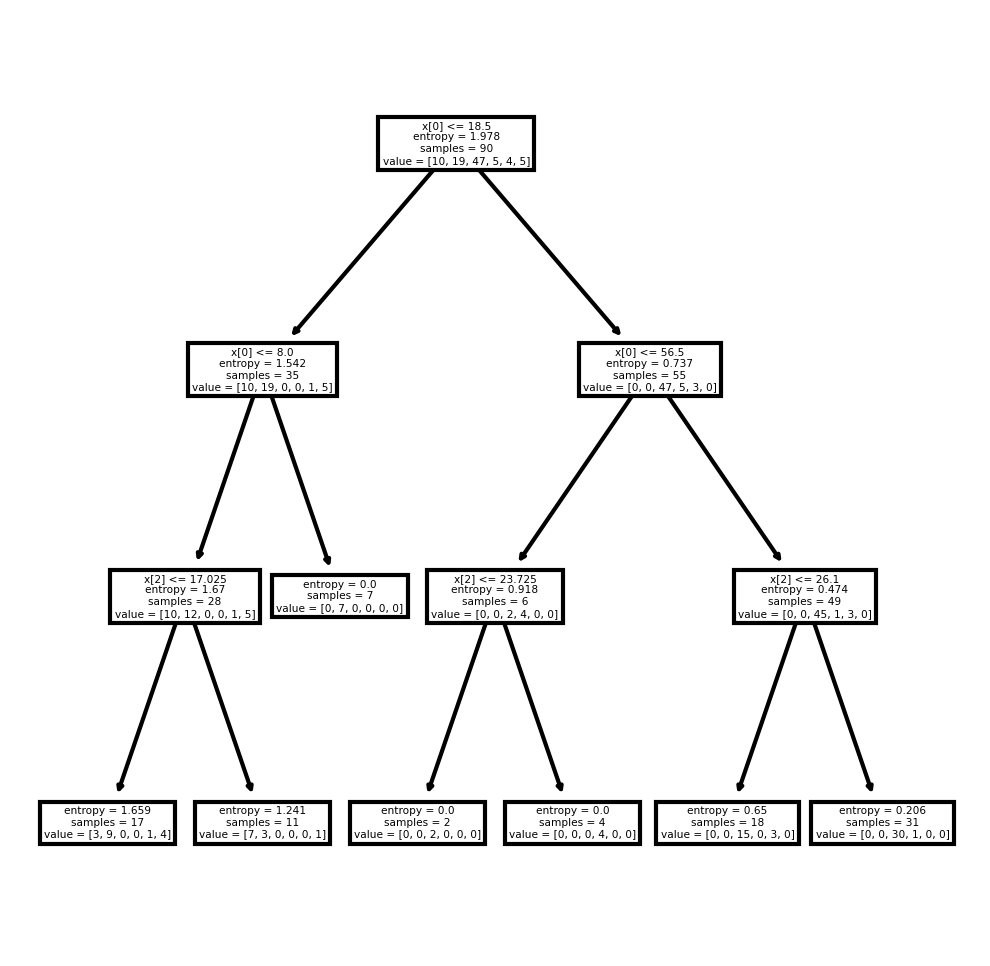

In [200]:
#it is okay that it has a maximum depth of 3. 
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(classifier)

# A decision tree is one of the most frequently used Machine Learning algorithms for solving regression as well as classification problems. As the name suggests, the algorithm uses a tree-like model of decisions to either predict the target value (regression) or predict the target class (classification).

In [202]:
# Importing the libraries
import numpy as np # for array operations
import pandas as pd # for working with DataFrames
import requests, io # for HTTP requests and I/O commands
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline

# scikit-learn modules
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.tree import DecisionTreeRegressor # for building the model

In [208]:
# Reading the diagnosis data
dataset = pd.read_csv('C:/Users/Admin/Machine Learning chapter 5/Classification Algorithms/petrol_consumption.csv')

In [209]:
dataset.head()

Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.0            3571            1976                         0.525   
1         9.0            4092            1250                         0.572   
2         9.0            3865            1586                         0.580   
3         7.5            4870            2351                         0.529   
4         8.0            4399             431                         0.544   

   Petrol_Consumption  
0                 541  
1                 524  
2                 561  
3                 414  
4                 410

In [210]:
x = dataset.drop('Petrol_Consumption', axis = 1) # Features
y = dataset['Petrol_Consumption']  # Target

In [211]:
# Splitting the dataset into training and testing set (80/20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 28)

In [212]:
# Initializing the Decision Tree Regression model
model = DecisionTreeRegressor(random_state = 0)

In [219]:
param_dict = {
    "criterion": ['poisson', 'absolute_error', 'squared_error'],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)
}

In [220]:
grid = GridSearchCV(model,
                   param_grid=param_dict,
                   cv=10,
                   verbose=1,
                   n_jobs=-1)

In [221]:
grid.fit(x_train,y_train)

Fitting 10 folds for each of 972 candidates, totalling 9720 fits


C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


1080 fits failed out of a total of 9720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\Admin\anacondalastone\lib\

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['poisson', 'absolute_error',
                                       'squared_error'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [222]:
grid.best_params_

{'criterion': 'poisson',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 9}

In [223]:
grid.best_estimator_

DecisionTreeRegressor(criterion='poisson', max_depth=5, min_samples_leaf=4,
                      min_samples_split=9, random_state=0)

In [224]:
from sklearn.metrics import r2_score

In [226]:
preds = grid.predict(x_test)

In [227]:
r2_score(y_test, preds)

0.2749103087825857

In [231]:
# RMSE (Root Mean Square Error)
rmse = np.sqrt(mean_squared_error(y_test, preds))
rmse

114.2670166847845

In [232]:
# Reading the dataset using pandas librarie
dataset = pd.read_csv('C:/Users/Admin/Machine Learning chapter 5/Classification Algorithms/winequality-red.csv')

In [235]:
dataset.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [233]:
# shape of the dataset
print(dataset.shape)
# Type of the dataset
print(dataset.dtypes)

(1599, 12)
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [234]:
# checking for the null value
print(dataset.isna().sum())
# Counting the number of null values
print(dataset.isna().sum().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
0


In [236]:
dataset['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [237]:
# independent variables
X = dataset.iloc[:, :-1].values
# dependent variable: quality
y = dataset.iloc[:, -1:].values

In [238]:
# spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X, y,test_size=0.2, random_state = 0)

In [239]:
# using feature scaling
from sklearn.preprocessing import StandardScaler
X_sc = StandardScaler()
X_train = X_sc.fit_transform(X_train)

In [240]:
# training the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)

In [241]:
param_dict = {
    "criterion": ['poisson', 'absolute_error', 'squared_error'],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)
}

In [242]:
grid = GridSearchCV(regressor,
                   param_grid=param_dict,
                   cv=10,
                   verbose=1,
                   n_jobs=-1)

In [243]:
grid.fit(X_train,y_train)

Fitting 10 folds for each of 972 candidates, totalling 9720 fits


C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


1080 fits failed out of a total of 9720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\Admin\anacondalastone\lib\

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['poisson', 'absolute_error',
                                       'squared_error'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [244]:
grid.best_params_

{'criterion': 'poisson',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 9}

In [245]:
grid.best_estimator_

DecisionTreeRegressor(criterion='poisson', max_depth=5, min_samples_leaf=4,
                      min_samples_split=9, random_state=0)

In [249]:
pred = grid.predict(X_test)

In [250]:
pred

array([6.60747664, 6.60747664, 6.60747664, 6.60747664, 6.60747664,
       6.60747664, 6.60747664, 6.60747664, 6.60747664, 6.60747664,
       6.60747664, 6.60747664, 6.60747664, 6.60747664, 6.60747664,
       6.60747664, 6.60747664, 6.60747664, 6.60747664, 6.60747664,
       6.60747664, 6.60747664, 6.60747664, 6.60747664, 6.60747664,
       6.60747664, 6.60747664, 6.60747664, 6.60747664, 6.60747664,
       6.60747664, 6.60747664, 6.60747664, 6.60747664, 6.60747664,
       6.60747664, 6.60747664, 6.60747664, 6.60747664, 6.60747664,
       6.60747664, 6.60747664, 6.60747664, 6.60747664, 6.60747664,
       6.60747664, 6.60747664, 6.60747664, 6.60747664, 6.60747664,
       6.60747664, 6.60747664, 6.60747664, 6.60747664, 6.60747664,
       6.60747664, 6.60747664, 6.60747664, 6.60747664, 6.60747664,
       6.60747664, 6.60747664, 6.60747664, 6.60747664, 6.60747664,
       6.60747664, 6.60747664, 6.60747664, 6.60747664, 6.60747664,
       6.60747664, 6.60747664, 6.60747664, 6.60747664, 6.60747

In [251]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import numpy as np
import pandas as pd 

In [279]:
URL='https://raw.githubusercontent.com/aviralb13/codes/main/datas/carprice.csv'
data = pd.read_csv(URL)
data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  carwidth  \
0  convertible        rwd          front       88.6      168.8      64.1   
1  convertible        rwd          front       88.6      168.8      64.1   
2    hatchback        rwd          front       94.5      171.2      65.5   
3        sedan        fwd          front       99.8      176.6      66.2   
4        sedan        4wd          front       99.4      176.6      66.4   

   carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc           four         130       mpfi   
1       48.8        2548       dohc           four         130       mpfi   
2       52.4        2823       ohcv            six         152       mpfi   
3       54.3        2337        ohc           four         109       mpfi   
4       54.3        2824        ohc           five         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

In [280]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [281]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [282]:
from sklearn import preprocessing
label = preprocessing.LabelEncoder()
data['drivewheel'] = label.fit_transform(data['drivewheel'])
data['carbody'] = label.fit_transform(data['carbody'])
data['cylindernumber'] = label.fit_transform(data['cylindernumber'])
data.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

   carbody  drivewheel enginelocation  wheelbase  carlength  carwidth  \
0        0           2          front       88.6      168.8      64.1   
1        0           2          front       88.6      168.8      64.1   
2        2           2          front       94.5      171.2      65.5   
3        3           1          front       99.8      176.6      66.2   
4        3           0          front       99.4      176.6      66.4   

   carheight  curbweight enginetype  cylindernumber  enginesize fuelsystem  \
0       48.8        2548       dohc               2         130       mpfi   
1       48.8        2548       dohc               2         130       mpfi   
2       52.4        2823       ohcv               3         152       mpfi   
3       54.3        2337        ohc               2         109       mpfi   
4       54.3        2824        ohc               1         136       mpfi   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0

so we have to encode 3 columns () — drivewheel, carbody, and cylinder number

And now I have created a list in which I think it will be the decidingfactor for a car price i.e. carbody, drivewheel, cylindernumber, curbweight, horsepower, peakrpm, citympg, and highwaympg and assign it to variable features now I will pass features in the dataset and store it as x and the price of the car as y.

In [283]:
features = ["carbody","drivewheel","cylindernumber", "curbweight", "horsepower", "peakrpm", "citympg", "highwaympg"]
x = data[features]
y = data["price"]

In [284]:
x

carbody  drivewheel  cylindernumber  curbweight  horsepower  peakrpm  \
0          0           2               2        2548         111     5000   
1          0           2               2        2548         111     5000   
2          2           2               3        2823         154     5000   
3          3           1               2        2337         102     5500   
4          3           0               1        2824         115     5500   
..       ...         ...             ...         ...         ...      ...   
200        3           2               2        2952         114     5400   
201        3           2               2        3049         160     5300   
202        3           2               3        3012         134     5500   
203        3           2               3        3217         106     4800   
204        3           2               2        3062         114     5400   

     citympg  highwaympg  
0         21          27  
1         21          27  
2         19          26  
3         24          30  
4         18          22  
..       ...         ...  
200       23          28  
201       19          25  
202       18          23  
203       26          27  
204       19          25  

[205 rows x 8 columns]

In [285]:
#8 features
len(x.columns)

8

In [286]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x,y)

In [287]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()

In [288]:
param_dict = {
    "criterion": ['poisson', 'absolute_error', 'squared_error'],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)
}

In [289]:
grid = GridSearchCV(tree,
                   param_grid=param_dict,
                   cv=10,
                   verbose=1,
                   n_jobs=-1)

In [290]:
train_x.shape, train_y.shape

((153, 8), (153,))

In [292]:
grid.fit(train_x,train_y)

Fitting 10 folds for each of 972 candidates, totalling 9720 fits


C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


1080 fits failed out of a total of 9720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\Admin\anacondalastone\lib\

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['poisson', 'absolute_error',
                                       'squared_error'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [293]:
grid.best_params_

{'criterion': 'poisson',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [294]:
grid.best_estimator_

DecisionTreeRegressor(criterion='poisson', max_depth=4, min_samples_leaf=2,
                      min_samples_split=3)

In [296]:
prediction = grid.predict(test_x)

we also can predict entered values simply by adding the values to the list manually.

In [298]:
grid.predict(([[0,2,2,2548,111,5000,21,27]]))

C:\Users\Admin\anacondalastone\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names



array([14078.])

here I have entered values

carbody=convertible=0

drivewheel=rwd=2

cylindernumber=four=2

curbweight=2548

horsepower=111

peakrpm=5000

citympg=21

highwaympg=27

which is the first value of our dataset and the real value is 13495.0 and predicted value is 13495, prediction 14078 is. Not perfect
but pretty good prediction. 

and also, we can predict values from our dataset i.e. here I am predicting first 5 values from dataset.

In [299]:
first_5_values_dataset = grid.predict(x[:5]) 

In [305]:
data['price'].iloc[:5]

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [306]:
first_5_values_dataset

array([14078.        , 14078.        , 15656.62857143, 11284.6       ,
       19479.68522222])

In [307]:
grid.score(test_x,prediction)

1.0

In [315]:
test_y.shape, len(prediction)

((52,), 52)

In [316]:
actuals_test = test_y.tolist()

In [317]:
import pandas as pd
ActualsVsPrediction = pd.DataFrame(
{'Actuals': actuals_test,
'Predictions': prediction
})

In [318]:
ActualsVsPrediction

Actuals   Predictions
0    8358.0   7283.650000
1   16630.0  15656.628571
2   13645.0  11395.000000
3    6692.0   6233.823529
4   10898.0   9717.681818
5    6575.0   7283.650000
6    7975.0   7941.705882
7    9959.0  11284.600000
8    8495.0   7941.705882
9    8921.0   9717.681818
10  10698.0   9717.681818
11  15645.0  11395.000000
12   7689.0   7941.705882
13   6785.0   9717.681818
14  19045.0  15656.628571
15  24565.0  15656.628571
16   7898.0   7941.705882
17   6692.0   6233.823529
18  17075.0  30736.000000
19  37028.0  32714.250000
20  14399.0  15656.628571
21  18920.0  19479.685222
22   5348.0   6233.823529
23  11245.0   9717.681818
24   8189.0   9717.681818
25  16503.0  25229.500000
26  34184.0  30736.000000
27   7295.0   7283.650000
28  10198.0   9717.681818
29  28176.0  30736.000000
30  11259.0   9717.681818
31  32528.0  32714.250000
32   6229.0   6233.823529
33  17950.0  15656.628571
34   8778.0  15656.628571
35  36880.0  42558.333333
36  21105.0  15656.628571
37  15985.0  15656.628571
38  18420.0  15656.628571
39  10345.0   7941.705882
40   7957.0   7941.705882
41  12170.0  15656.628571
42   5499.0   7283.650000
43   6989.0   9717.681818
44  28248.0  30736.000000
45   5151.0   6233.823529
46  14869.0  15656.628571
47  10795.0   9717.681818
48  11900.0  15656.628571
49  16925.0  11284.600000
50   7609.0   6233.823529
51   8195.0   7941.705882

In [319]:
ActualsVsPrediction['difference'] = abs(ActualsVsPrediction.Actuals - ActualsVsPrediction.Predictions)

In [320]:
ActualsVsPrediction

Actuals   Predictions    difference
0    8358.0   7283.650000   1074.350000
1   16630.0  15656.628571    973.371429
2   13645.0  11395.000000   2250.000000
3    6692.0   6233.823529    458.176471
4   10898.0   9717.681818   1180.318182
5    6575.0   7283.650000    708.650000
6    7975.0   7941.705882     33.294118
7    9959.0  11284.600000   1325.600000
8    8495.0   7941.705882    553.294118
9    8921.0   9717.681818    796.681818
10  10698.0   9717.681818    980.318182
11  15645.0  11395.000000   4250.000000
12   7689.0   7941.705882    252.705882
13   6785.0   9717.681818   2932.681818
14  19045.0  15656.628571   3388.371429
15  24565.0  15656.628571   8908.371429
16   7898.0   7941.705882     43.705882
17   6692.0   6233.823529    458.176471
18  17075.0  30736.000000  13661.000000
19  37028.0  32714.250000   4313.750000
20  14399.0  15656.628571   1257.628571
21  18920.0  19479.685222    559.685222
22   5348.0   6233.823529    885.823529
23  11245.0   9717.681818   1527.318182
24   8189.0   9717.681818   1528.681818
25  16503.0  25229.500000   8726.500000
26  34184.0  30736.000000   3448.000000
27   7295.0   7283.650000     11.350000
28  10198.0   9717.681818    480.318182
29  28176.0  30736.000000   2560.000000
30  11259.0   9717.681818   1541.318182
31  32528.0  32714.250000    186.250000
32   6229.0   6233.823529      4.823529
33  17950.0  15656.628571   2293.371429
34   8778.0  15656.628571   6878.628571
35  36880.0  42558.333333   5678.333333
36  21105.0  15656.628571   5448.371429
37  15985.0  15656.628571    328.371429
38  18420.0  15656.628571   2763.371429
39  10345.0   7941.705882   2403.294118
40   7957.0   7941.705882     15.294118
41  12170.0  15656.628571   3486.628571
42   5499.0   7283.650000   1784.650000
43   6989.0   9717.681818   2728.681818
44  28248.0  30736.000000   2488.000000
45   5151.0   6233.823529   1082.823529
46  14869.0  15656.628571    787.628571
47  10795.0   9717.681818   1077.318182
48  11900.0  15656.628571   3756.628571
49  16925.0  11284.600000   5640.400000
50   7609.0   6233.823529   1375.176471
51   8195.0   7941.705882    253.294118

In [322]:
ActualsVsPrediction['Actuals'].min()

5151.0

In [323]:
ActualsVsPrediction['Predictions'].max()

42558.333333333336

In [321]:
#MAE done manually. 
ActualsVsPrediction['difference'].mean()

2337.13038710146

# With a maximum price of 42,558.33 and minimum price of 5,151 in the test actual values the mean absolute difference is only 2337. The model is giving really good results. However, I do not know why the score gives a 100% accuracy because the model is giving a high accuracy but NOT perfect. 

In [324]:
from sklearn.metrics import mean_absolute_error
errors = (mean_absolute_error(test_y,prediction)) 

print(errors)

2337.130387101461


# Mean Absolute Error (MAE) is 2337.13

In [325]:
# RMSE (Root Mean Square Error)
rmse = np.sqrt(mean_squared_error(test_y, prediction))
rmse

3531.071754913086

# root-mean-square error (RMSE) is 3531.07

In [326]:
from sklearn.metrics import r2_score

In [327]:
r2_score(test_y, prediction)

0.8178007464188753

# This gives a more realistic score compared to the results that it is a high score > 80% but not perfect. 